In [4]:
#Bibliotecas importadas

import numpy as np
import matplotlib.pylab as plt

In [5]:
#Base do código Runge-Kutta de ordem 4:

def rk4vec( t0, m, u0, dt, f ):
    
    f0 = f ( t0, m, u0 )
    t1 = t0 + dt / 2.0
    u1 = np.zeros ( m )
    u1[0:m] = u0[0:m] + dt * f0[0:m] / 2.0
    f1 = f ( t1, m, u1 )
    
    t2 = t0 + dt / 2.0
    u2 = np.zeros ( m )
    u2[0:m] = u0[0:m] + dt * f1[0:m] / 2.0
    f2 = f ( t2, m, u2 )
    
    t3 = t0 + dt
    u3 = np.zeros ( m )
    u3[0:m] = u0[0:m] + dt * f2[0:m]
    f3 = f ( t3, m, u3 )
    
    u = np.zeros ( m )
    u[0:m] = u0[0:m] + ( dt / 6.0 ) * ( \
                                       f0[0:m] \
                                       + 2.0 * f1[0:m] \
                                       + 2.0 * f2[0:m] \
                                       +       f3[0:m] )
    return u

In [6]:
### Velocidade inicial --> v0 = [Vx,Vy,Vz]:
v0 = [0,7000,0]

### Posição inicial --> r0 = [Rx,Ry,Rz]:
r0 = [10000000,0,0]


def particula():
    m = 6   # numero de equações de derivadas (vx,vy,vz,ax,ay,az)
    
    n = 10000 ### número de passos temporais
    tmin = 0
    tmax = 14710 ### tempo máximo de simulação
    t = np.linspace(tmin,tmax,n)
    dt = t[1] - t[0]
    
    # cria arrays que recebem os dados de posição e velocidade
    x  = np.zeros([n])
    vx = np.zeros([n])
    y  = np.zeros([n])
    vy = np.zeros([n])
    z  = np.zeros([n])
    vz = np.zeros([n])
    
    # cria arrays para os dados das derivadas
    u0 = np.zeros([m])
    
    u1 = np.zeros_like(u0)
    
    # condicoes iniciais
    u0[0] = r0[0] #x0
    u0[1] = v0[0] #v0x
    u0[2] = r0[1] #y0
    u0[3] = v0[1] #v0y
    u0[4] = r0[2] #z0
    u0[5] = v0[2] #v0z

    # tempo inicial
    t0 = t[0]
    
    for i in range(n):
        
        # colocamos os valores iniciais nos arrays das variaveis
        
        x[i]  = u0[0]
        vx[i] = u0[1]
        y[i]  = u0[2]
        vy[i] = u0[3]
        z[i]  = u0[4]
        vz[i] = u0[5]
        
        # chamamos a rotina rk4vec
        u1 = rk4vec( t[i], m, u0, dt, part_f)
        
        u0 = np.copy(u1)
        
    return x,vx,y,vy,z,vz,t

In [7]:
# Funcao que tem as equacoes diferenciais
def part_f(t,m,u):
    uprime = np.zeros_like(u)
    
    #LEGENDA:
    
    #u[0] = x
    #u[1] = vx
    #u[2] = y
    #u[3] = vx
    #u[4] = z
    #u[5] = vz
    #uprime[0] = derivada da posição em x (velocidade vx)
    #uprime[1] = derivada da velocidade em x (aceleração ax)
    #uprime[2] = derivada da posição em y (velocidade vy)
    #uprime[3] = derivada da velocidade em y (aceleração ay)
    #uprime[4] = derivada da posição em z (velocidade vz)
    #uprime[5] = derivada da velocidade em z (aceleração az)
    
    
    #Dados para definição da Força Gravitacional (F)
    
    #Massa da Terra:
    M = 5.97e24
    
    #Massa do Satélite:
    m = 4.5e8
    
    #Constante gravitacional universal:
    G = 6.67e-11
    
    #Parâmetro gravitacional padrão
    µ = 398600e9
    
    #Distancia entre o satélite e a Terra
    r = np.sqrt(u[0]**2 + u[2]**2)          #r^2 = x^2 + y^2
    
    #Força gravitacional:
    F = -(µ * m) / (r**2)
    
    #Aceleração gravitacional:
    a = F/m
    
    #Angulo entre o vetor da força e o eixo adjascente ao ângulo:
    angulo = np.arctan(abs(u[2]/u[0]))      # angulo = arctan(|y/x|)
    
    #Aceleração em x:
    ax = a*np.cos(angulo)
    
    #Aceleração em y:
    ay = a*np.sin(angulo)
    
    #Aceleração em z:
    az = 0
    

    uprime[0] = u[1]    #Derivada de x = vx
    
    uprime[2] = u[3]    #Derivada de y = vy
    
    uprime[4] = u[5]    #Derivada de z = vz
        
        
    #Condições para que a aceleração sempre aponte para o centro:
    
    if u[0] > 0:             #Se x é positivo:
        uprime[1] = ax           #Derivada de vx = -ax    
        
    
    if u[0] < 0:             #Se x é negativo:
        uprime[1] = -ax          #Derivada de vx = ax      
        
                         
    if u[2] > 0:             #Se y é positivo:                         
        uprime[3] = ay           #Derivada de vy = -ay    
        
        
    if u[2] < 0:             #Se y é negativo:   
        uprime[3] = -ay          #Derivada de vy = ay    
        
        
    if u[0] == 0:            #Se x = 0:
        uprime[1] = 0            #Derivada de vx = 0
        
          
    if u[2] == 0:            #Se y = 0:
        uprime[3] = 0            #Derivada de vy = 0
        
        
    uprime[5] = 0            #Derivada de vz = 0
    
    
    return uprime

In [8]:
x,vx,y,vy,z,vz,t = particula()

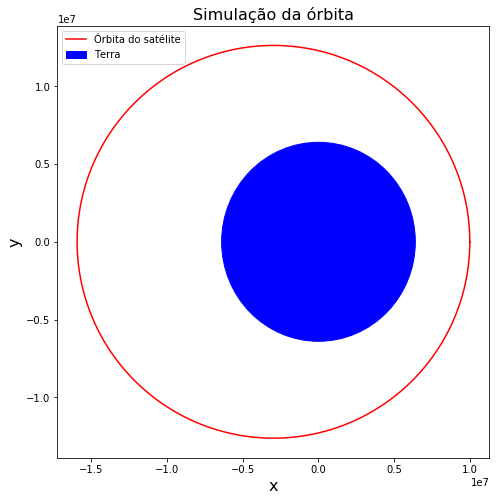

In [9]:
#Gráfico:

fig = plt.figure()

#Tamanho do gráfico
ax = fig.add_axes([0.1,0.1,1,1.5])

#Plotagem da posição y em função de x:
ax.plot(x, y, color='r', label = "Órbita do satélite")

#Definir limites do gráfico (opcional)
#plt.xlim(-1.75e7,1.25e7)
#plt.ylim(-1.5e7,1.5e7)

#Desenho da Terra (considerando raio aproximado de 6400 km)
Terra = plt.Circle((0,0), 6400000, color='b', label = "Terra")
ax.add_patch(Terra)

#Local da legenda
ax.legend(loc=2)

#Títulos dos eixos e principal
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_title("Simulação da órbita",fontsize=16);

In [28]:
print(max(x))
print(min(x))

10000000.0
-15950520.775040077


In [29]:
print(max(y))
print(min(y))

12629536.922702722
-12629536.858716426
